In [4]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from preprocess_blur import preprocess
from display_bar_chart import display_bar_chart

from tensorflow.keras.applications.efficientnet import preprocess_input

In [5]:
image_size = 380

labels = ['Level_0','Level_1','Level_2','level_3','Level_4']

def create_data(paths):
    
    images = []
    
    for label in labels:
        dir = os.path.join(paths,label)
        class_num = labels.index(label)
        
        for image in os.listdir(dir):
            image_read = cv.imread(os.path.join(dir,image))
            image_read = cv.cvtColor(image_read,cv.COLOR_BGR2RGB)
            image_resized = preprocess(image_read,sigmaX=10,IMG_SIZE=380)
            image_resized = cv.resize(image_resized,(image_size,image_size))
            image_resized= preprocess_input(image_resized)
            images.append([image_resized,class_num])
            
    return np.array(images)

In [6]:
val = create_data('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Val/')

In [7]:
X_val = []
y_val = []

for feature, label in val:
    X_val.append(feature)
    y_val.append(label)
    
X_val = np.array(X_val)
y_val = np.array(y_val)
y_val = np.expand_dims(y_val, axis=1)

print(X_val.shape)
print(y_val.shape)

(5125, 380, 380, 3)
(5125, 1)


In [8]:
model_1 = tf.keras.models.load_model('EfficientNetb4_blur_1.h5')
model_2 = tf.keras.models.load_model('EfficientNetb4_blur_2.h5')
model_3 = tf.keras.models.load_model('EfficientNetb4_blur_noisystudent_1.h5')
model_4 = tf.keras.models.load_model('EfficientNetb4_blur_noisystudent_2.h5')
model_5 = tf.keras.models.load_model('EfficientNetb3_blur_1.h5')

In [9]:
P1 = model_1.predict(X_val, steps=len(X_val)).argmax(axis=1)
P2 = model_2.predict(X_val, steps=len(X_val)).argmax(axis=1)
P3 = model_3.predict(X_val, steps=len(X_val)).argmax(axis=1)
P4 = model_4.predict(X_val, steps=len(X_val)).argmax(axis=1)

In [30]:
weighted_pred = (0.40*P1+0.20*P2+0.20*P3+0.20*P4)

In [31]:
final_pred = weighted_pred.astype(int)

In [32]:
print(final_pred)

[0 0 0 ... 2 4 4]


([<matplotlib.axis.YTick at 0x25dae47ba48>,
 [Text(0, 0, 'Level_0'),
  Text(0, 1, 'Level_1'),
  Text(0, 2, 'Level_2'),
  Text(0, 3, 'level_3'),
  Text(0, 4, 'Level_4')])

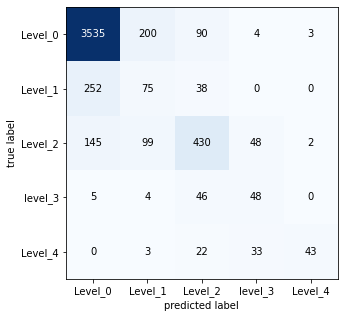

In [33]:
matrix = confusion_matrix (y_val, final_pred)
plot_confusion_matrix(matrix, figsize=(5,5))
plt.xticks(range(5), ['Level_0','Level_1','Level_2','level_3','Level_4'], fontsize=10)
plt.yticks(range(5), ['Level_0','Level_1','Level_2','level_3','Level_4'], fontsize=10)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def f_score(y,P,level):
    
    print(f'Level_{level}')
    print('Weighted Precision: {:.2f}'.format(precision_score(y, P, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y, P, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y, P, average='weighted')))
    
def accuracy (y,P,level):
    
    print(f'Level_{level}')
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y, P)))

In [35]:
f_score(y_val,final_pred, 1234)

Level_1234
Weighted Precision: 0.81
Weighted Recall: 0.81
Weighted F1-score: 0.80


In [36]:
test = create_data('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Test/')
print('Dataset created')

Dataset created


In [37]:
#load test images and labels in X_test and y_test

X_test = []
y_test = []

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test = np.expand_dims(y_test, axis=1)

print(X_test.shape)
print(y_test.shape)

(53576, 380, 380, 3)
(53576, 1)


Number of Level_0 images =  39533
Number of Level_1 images =  3762
Number of Level_2 images =  7861
Number of Level_3 images =  1214
Number of Level_4 images =  1206


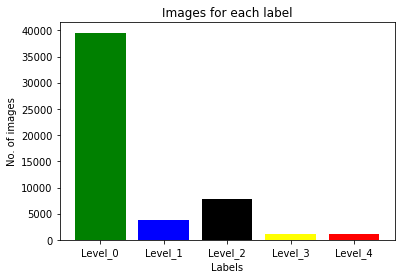

In [38]:
display_bar_chart(y_test)

In [40]:
P1_test = model_1.predict(X_test, batch_size=4).argmax(axis=1)
P2_test = model_2.predict(X_test, batch_size=4).argmax(axis=1)
P3_test = model_3.predict(X_test, batch_size=4).argmax(axis=1)
P4_test = model_4.predict(X_test, batch_size=4).argmax(axis=1)

In [41]:
weighted_pred_test = (0.35*P1_test+0.25*P2_test+0.20*P3_test+0.20*P3_test)
final_pred_test = weighted_pred_test.astype(int)
print(final_pred_test)

[2 0 1 ... 3 3 3]


Number of Level_0 images =  40910
Number of Level_1 images =  3603
Number of Level_2 images =  6595
Number of Level_3 images =  1666
Number of Level_4 images =  802


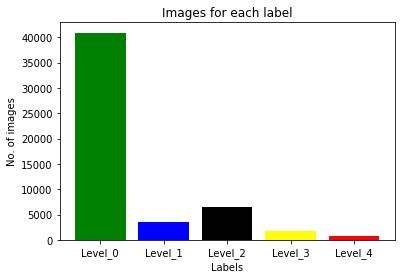

In [62]:
display_bar_chart(final_pred_test)

([<matplotlib.axis.YTick at 0x268959bedc8>,
 [Text(0, 0, 'Level_0'),
  Text(0, 1, 'Level_1'),
  Text(0, 2, 'Level_2'),
  Text(0, 3, 'level_3'),
  Text(0, 4, 'Level_4')])

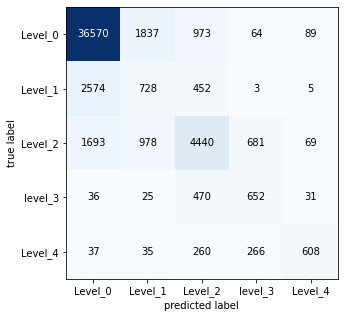

In [43]:
cnf_matrix = confusion_matrix (y_test, final_pred_test)
plot_confusion_matrix(cnf_matrix, figsize=(5,5))
plt.xticks(range(5), ['Level_0','Level_1','Level_2','level_3','Level_4'], fontsize=10)
plt.yticks(range(5), ['Level_0','Level_1','Level_2','level_3','Level_4'], fontsize=10)

In [44]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [45]:
f_score(y_test,final_pred_test, 1234)

Level_1234
Weighted Precision: 0.80
Weighted Recall: 0.80
Weighted F1-score: 0.80


In [47]:
TP

array([36570.,   728.,  4440.,   652.,   608.])

In [48]:
# Precision or positive predictive value
PPV = TP[0]/(TP[0]+FP[0])
print(PPV)

0.8939134685895869


In [49]:
def metrics(level):
    
    PPV = TP[level]/(TP[level]+FP[level])
    print(f'PPV- Precision of Level_{level} = ',PPV)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP[level]/(TP[level]+FN[level])
    
    print(f'Recall - Sensitivity of Level_{level} = ',TPR)
    
    # F-score
    F_score = (2*PPV*TPR)/(PPV+TPR)
    print(f'F-score of Level_{level} = ',F_score)

In [50]:
metrics(level=0)

PPV- Precision of Level_0 =  0.8939134685895869
Recall - Sensitivity of Level_0 =  0.9250499582627172
F-score of Level_0 =  0.9092152207152892


In [51]:
metrics(level=1)

PPV- Precision of Level_1 =  0.20205384401887316
Recall - Sensitivity of Level_1 =  0.19351408825093036
F-score of Level_1 =  0.1976917854718262


In [52]:
metrics(level=2)

PPV- Precision of Level_2 =  0.6732373009855952
Recall - Sensitivity of Level_2 =  0.5648136369418649
F-score of Level_2 =  0.6142778085224129


In [53]:
metrics(level=3)

PPV- Precision of Level_3 =  0.39135654261704683
Recall - Sensitivity of Level_3 =  0.5370675453047776
F-score of Level_3 =  0.45277777777777783


In [54]:
metrics(level=4)

PPV- Precision of Level_4 =  0.7581047381546134
Recall - Sensitivity of Level_4 =  0.5041459369817579
F-score of Level_4 =  0.6055776892430279


In [56]:
PPV = np.sum(TP)/np.sum(TP+FP)
print(PPV)

0.8025608481409586


In [57]:
Recall = np.sum(TP)/np.sum(TP+FN)
print(Recall)

0.8025608481409586


In [58]:
F_score = 2*PPV*Recall/(PPV+Recall)
print(F_score)

0.8025608481409586


In [59]:
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

[0.86368897 0.88970808 0.89592355 0.97058384 0.98521726]


In [60]:
def f_score_macro(y,P,level):
    
    print(f'Level_{level}')
    print('Macro Precision: {:.2f}'.format(precision_score(y, P, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y, P, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y, P, average='macro')))

In [61]:
f_score_macro(y_test,final_pred_test,1234)

Level_1234
Macro Precision: 0.58
Macro Recall: 0.54
Macro F1-score: 0.56



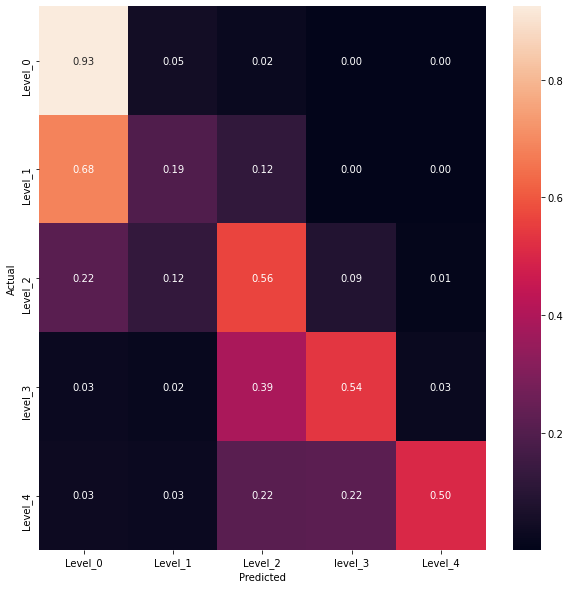

In [64]:
target_names = ['Level_0','Level_1','Level_2','level_3','Level_4']
cm = confusion_matrix(y_test, final_pred_test)
# Normalise
cmn = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)